In [1]:
%load_ext sql
%sql sqlite:///chinook.db

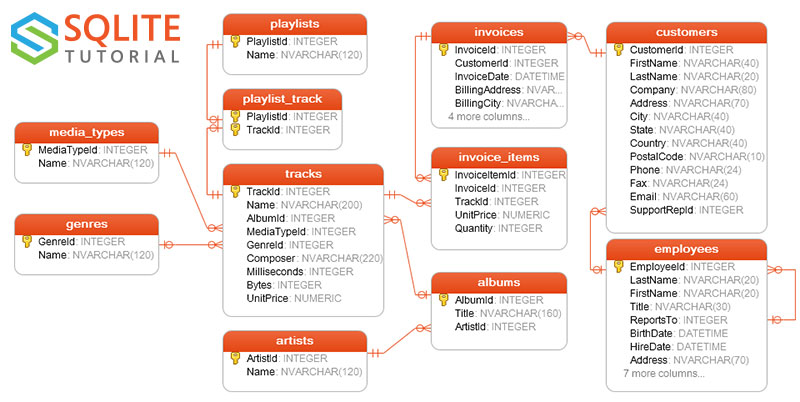

## Задание 1
Вывести страну, где популярнее всего группа Iron Maiden (т.е. треков куплено больше, чем в других странах).

In [23]:
%%sql

SELECT Country, COUNT(*) as TotalTracks FROM customers cus
    JOIN invoices inv on cus.CustomerId = inv.CustomerId
    JOIN invoice_items inv_it on inv.InvoiceId = inv_it.InvoiceId
    JOIN tracks t on inv_it.TrackId = t.TrackId
    JOIN albums alb on t.AlbumId = alb.AlbumId
    JOIN artists art on art.ArtistId = alb.ArtistId
WHERE art.Name = "Iron Maiden"
GROUP BY Country
ORDER BY TotalTracks DESC limit 1;

 * sqlite:///chinook.db
Done.


[('USA', 34)]

## Задание 2
Вывести альбом, который является максимальным по продолжительности среди альбомов со стоимостью, большей средней цены за альбом *(цена альбома - сумма цен треков)*.

In [42]:
%%sql

SELECT Title, SUM(t.Milliseconds) as Duration, SUM(t.UnitPrice) as AlbumPrice FROM albums alb
    JOIN tracks t on alb.AlbumId = t.AlbumId
GROUP BY Title
HAVING AlbumPrice > AVG(t.UnitPrice)
ORDER BY Duration DESC limit 1;

 * sqlite:///chinook.db
Done.


[('Lost, Season 3', 70665582, 51.74000000000001)]

## Задание 3
Вывести общую стоимость треков, приобретённых компаниями (только клиентами из конкретных компаний), которые обслуживались сотрудниками, нанятыми после 3 августа 2002 года.

In [6]:
%%sql

select MIN(HireDate), MAX(HireDate) from employees

 * sqlite:///chinook.db
Done.


[('2002-04-01 00:00:00', '2004-03-04 00:00:00')]

In [16]:
%%sql

SELECT cus.Company, SUM(t.UnitPrice) as TotalTracks FROM employees emp
    JOIN customers cus on emp.EmployeeId = cus.SupportRepId
    JOIN invoices inv on cus.CustomerId = inv.CustomerId
    JOIN invoice_items inv_it on inv.InvoiceId = inv_it.InvoiceId
    JOIN tracks t on inv_it.TrackId = t.TrackId
    JOIN albums alb on t.AlbumId = alb.AlbumId
    JOIN artists art on art.ArtistId = alb.ArtistId
WHERE emp.HireDate > '2002-08-03 00:00:00' and cus.Company is not null
GROUP BY cus.Company;

 * sqlite:///chinook.db
Done.


[('Banco do Brasil S.A.', 37.61999999999999),
 ('Google Inc.', 37.61999999999999),
 ('JetBrains s.r.o.', 40.62),
 ('Microsoft Corporation', 39.61999999999999),
 ('Telus', 37.61999999999999),
 ('Woodstock Discos', 37.61999999999999)]

## Задание 4
Для каждого альбома определить все жанры песен, которые в нём есть и количество песен по каждому жанру (формат вывода: альбом, жанр, количество).
Выводить только те альбомы, где жанров больше одного.

In [33]:
%%sql

SELECT alb.Title AS Album, g.Name AS Genre, COUNT(t.TrackId) AS Count FROM albums alb
    JOIN tracks t ON alb.AlbumId = t.AlbumId
    JOIN genres g ON t.GenreId = g.GenreId
GROUP BY alb.Title, g.Name
HAVING COUNT(g.GenreId) > 1
ORDER BY alb.Title, g.Name;

 * sqlite:///chinook.db
Done.


[('...And Justice For All', 'Metal', 9),
 ('20th Century Masters - The Millennium Collection: The Best of Scorpions', 'Rock', 12),
 ('A Matter of Life and Death', 'Rock', 11),
 ('A Real Dead One', 'Metal', 12),
 ('A Real Live One', 'Metal', 11),
 ('A TempestadeTempestade Ou O Livro Dos Dias', 'Latin', 15),
 ('A-Sides', 'Rock', 17),
 ('Ace Of Spades', 'Metal', 15),
 ('Achtung Baby', 'Rock', 12),
 ('Acústico', 'Alternative & Punk', 22),
 ('Acústico MTV', 'Latin', 21),
 ('Acústico MTV [Live]', 'Reggae', 17),
 ('Afrociberdelia', 'Latin', 23),
 ('Album Of The Year', 'Alternative & Punk', 12),
 ('Alcohol Fueled Brewtality Live! [Disc 1]', 'Metal', 13),
 ('Alcohol Fueled Brewtality Live! [Disc 2]', 'Metal', 5),
 ("All That You Can't Leave Behind", 'Rock', 11),
 ('American Idiot', 'Alternative & Punk', 13),
 ('Angel Dust', 'Alternative & Punk', 14),
 ('Ao Vivo [IMPORT]', 'Latin', 19),
 ('Appetite for Destruction', 'Rock', 12),
 ('Are You Experienced?', 'Rock', 17),
 ('Arquivo II', 'Latin', 12),
 ('Arquivo Os Paralamas Do Sucesso', 'Latin', 16),
 ('As Canções de Eu Tu Eles', 'Soundtrack', 14),
 ('Audioslave', 'Rock', 14),
 ('Axé Bahia 2001', 'Pop', 14),
 ('B-Sides 1980-1990', 'Rock', 15),
 ('BBC Sessions [Disc 1] [Live]', 'Rock', 14),
 ('BBC Sessions [Disc 2] [Live]', 'Rock', 10),
 ('Back to Black', 'R&B/Soul', 12),
 ('BackBeat Soundtrack', 'Rock And Roll', 12),
 ('Barulhinho Bom', 'Latin', 18),
 ('Battlestar Galactica (Classic), Season 1', 'Sci Fi & Fantasy', 24),
 ('Battlestar Galactica, Season 3', 'Sci Fi & Fantasy', 2),
 ('Battlestar Galactica, Season 3', 'Science Fiction', 12),
 ('Battlestar Galactica, Season 3', 'TV Shows', 5),
 ('Beyond Good And Evil', 'Rock', 12),
 ('Big Ones', 'Rock', 15),
 ('Black Album', 'Metal', 12),
 ('Black Sabbath', 'Metal', 7),
 ('Black Sabbath Vol. 4 (Remaster)', 'Metal', 10),
 ('Blizzard of Ozz', 'Rock', 2),
 ('Blood Sugar Sex Magik', 'Alternative & Punk', 17),
 ('Blue Moods', 'Jazz', 13),
 ('Body Count', 'Alternative & Punk', 17),
 ('Bongo Fury', 'Rock', 9),
 ('Brave New World', 'Rock', 10),
 ('By The Way', 'Rock', 16),
 ('Cafezinho', 'World', 14),
 ('Californication', 'Rock', 15),
 ('Carnaval 2001', 'Soundtrack', 14),
 ('Carry On', 'Alternative', 14),
 ('Cesta Básica', 'Alternative & Punk', 10),
 ('Chemical Wedding', 'Metal', 11),
 ('Chill: Brazil (Disc 1)', 'Latin', 17),
 ('Chill: Brazil (Disc 2)', 'Latin', 17),
 ('Chronicle, Vol. 1', 'Rock', 20),
 ('Chronicle, Vol. 2', 'Rock', 20),
 ('Cidade Negra - Hits', 'Reggae', 14),
 ('Coda', 'Rock', 8),
 ('Come Taste The Band', 'Rock', 9),
 ('Compositores', 'Rock', 15),
 ('Contraband', 'Rock', 13),
 ('Core', 'Rock', 12),
 ('Cássia Eller - Coleção Sem Limite [Disc 2]', 'Latin', 15),
 ('Cássia Eller - Sem Limite [Disc 1]', 'Latin', 15),
 ('Da Lama Ao Caos', 'Latin', 13),
 ('Dance Of Death', 'Heavy Metal', 11),
 ('Dark Side Of The Moon', 'Rock', 9),
 ('Deep Purple In Rock', 'Rock', 7),
 ('Deixa Entrar', 'Latin', 14),
 ('Demorou...', 'World', 12),
 ('Diver Down', 'Rock', 12),
 ('Djavan Ao Vivo - Vol. 02', 'Latin', 13),
 ('Djavan Ao Vivo - Vol. 1', 'Latin', 13),
 ('Elis Regina-Minha História', 'Latin', 14),
 ('Emergency On Planet Earth', 'Rock', 10),
 ('English Renaissance', 'Classical', 2),
 ('Every Kind of Light', 'Rock', 2),
 ('Faceless', 'Metal', 12),
 ('Facelift', 'Rock', 12),
 ('Fear Of The Dark', 'Rock', 12),
 ('Fireball', 'Rock', 7),
 ('For Those About To Rock We Salute You', 'Rock', 10),
 ('Frank', 'Pop', 11),
 ('From The Muddy Banks Of The Wishkah [Live]', 'Rock', 17),
 ('Garage Inc. (Disc 1)', 'Metal', 11),
 ('Garage Inc. (Disc 2)', 'Metal', 16),
 ('Get Born', 'Alternative & Punk', 13),
 ('Greatest Hits', 'Metal', 14),
 ('Greatest Hits', 'Reggae', 13),
 ('Greatest Hits', 'Rock', 30),
 ('Greatest Hits I', 'Rock', 17),
 ('Greatest Hits II', 'Rock', 17),
 ('Greatest Kiss', 'Rock', 20),
 ('Green', 'Alternative & Punk', 11),
 ('Heart of the Night', 'Jazz', 12),
 ('Heroes, Season 1', 'Drama', 20),
 ('Heroes, Season 1', 'TV Shows', 3),
 ('Hot Rocks, 1964-1971

## Задание 5
Для каждого артиста (таблицы Artists), у которых есть песни нескольких жанров, найти жанр, по которому он заработал наибольшее количество денег, а также вывести соотношение суммы, заработанной артистом по этому жанру к общей сумме заработанных денег. Если по нескольким жанрам заработано одинаковое количество денег, максимальное для артиста, то выбирается жанр раньше по алфавиту. Формат вывода: артист, жанр, соотношение.

In [ ]:
%%sql

SELECT art.Name AS Album, g.Name AS Genre, COUNT(t.TrackId) AS Count FROM artists art
    JOIN tracks t ON alb.AlbumId = t.AlbumId
    JOIN genres g ON t.GenreId = g.GenreId
GROUP BY alb.Title, g.Name
HAVING COUNT(g.GenreId) > 1
ORDER BY alb.Title, g.Name;